## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

In [2]:
df = pd.read_csv("./data/diabetes.csv", sep=",")

# Data preparation

## Scaling

In [4]:
scaler_std = StandardScaler()
scaled_std = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)
scaled_std.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,8.037814e-18,1.001133,-2.254290,-0.784172,0.113172,0.800500,2.327895
SEX,442.0,1.607563e-16,1.001133,-0.938537,-0.938537,-0.938537,1.065488,1.065488
BMI,442.0,1.004727e-16,1.001133,-1.897929,-0.719625,-0.153132,0.656952,3.585718
BP,442.0,1.060991e-15,1.001133,-2.363050,-0.770650,-0.119214,0.749368,2.776058
S1,442.0,-2.893613e-16,1.001133,-2.665411,-0.720020,-0.090841,0.596193,3.235851
S2,442.0,-1.245861e-16,1.001133,-2.430626,-0.638249,-0.080291,0.627442,4.179278
S3,442.0,-1.326239e-16,1.001133,-2.150883,-0.738296,-0.138431,0.616239,3.809072
S4,442.0,-1.446806e-16,1.001133,-1.606102,-0.830301,-0.054499,0.721302,3.894331
S5,442.0,2.250588e-16,1.001133,-2.651040,-0.698949,-0.040937,0.681851,2.808722
S6,442.0,2.371155e-16,1.001133,-2.896390,-0.697549,-0.022657,0.586922,2.851075


In [5]:
scaler_mm = MinMaxScaler()
scaled_mm = pd.DataFrame(scaler_mm.fit_transform(df), columns=df.columns)
scaled_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,0.491968,0.218484,0.0,0.320833,0.516667,0.666667,1.0
SEX,442.0,0.468326,0.499561,0.0,0.000000,0.000000,1.000000,1.0
BMI,442.0,0.346107,0.182567,0.0,0.214876,0.318182,0.465909,1.0
BP,442.0,0.459817,0.194807,0.0,0.309859,0.436620,0.605634,1.0
S1,442.0,0.451668,0.169647,0.0,0.329657,0.436275,0.552696,1.0
S2,442.0,0.367725,0.151460,0.0,0.271165,0.355578,0.462649,1.0
S3,442.0,0.360889,0.167977,0.0,0.237013,0.337662,0.464286,1.0
S4,442.0,0.291996,0.182010,0.0,0.141044,0.282087,0.423131,1.0
S5,442.0,0.485560,0.183366,0.0,0.357542,0.478062,0.610446,1.0
S6,442.0,0.503942,0.174187,0.0,0.382576,0.500000,0.606061,1.0


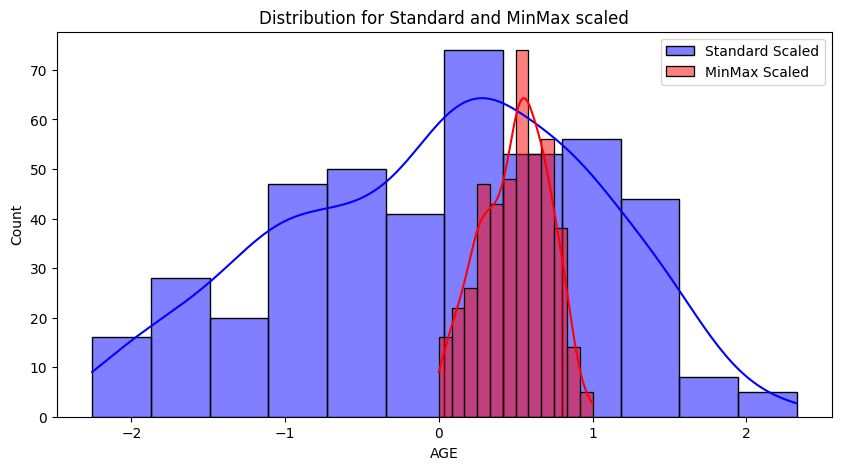

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(scaled_std.iloc[:,0], kde=True, color='blue', label='Standard Scaled')
sns.histplot(scaled_mm.iloc[:,0], kde=True, color='red', label='MinMax Scaled')
plt.legend()
plt.title('Distribution for Standard and MinMax scaled')
plt.show()

## Train Test Split

In [7]:
target = "Y"

X = df.drop(target, axis=1)
y = df[target]
test_size=0.2
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print('Train size:', X_train.shape, '| Test size:', X_test.shape)

Train size: (353, 10) | Test size: (89, 10)


## Outliers detection

In [13]:
# IQR method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers_iqr[outliers_iqr > 0])

BMI    3
S1     8
S2     7
S3     7
S4     2
S5     4
S6     9
dtype: int64


In [12]:
# Z-score method

z_scores = np.abs(stats.zscore(df))
outliers_z = (z_scores > 3).sum(axis=0)
print(outliers_z[outliers_z > 0])

[2 2 2 5 4]


In [15]:
scaler = RobustScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

X_train_scaled.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
17,0.894737,1.0,0.266667,0.857143,0.622222,0.895288,-0.5625,0.5,0.418177,-0.066667
66,-0.263158,1.0,-0.200000,-0.380952,-0.266667,0.272251,-1.1250,1.0,0.013217,0.266667
137,-0.052632,0.0,0.850000,1.428571,-0.177778,-0.204188,0.0000,0.0,0.263796,-0.266667
245,-0.526316,0.0,-0.466667,-0.333333,-0.844444,-0.910995,0.6250,-0.5,-0.736340,-2.133333
31,-0.473684,0.0,-0.933333,-1.047619,-0.555556,-0.827225,1.1250,-1.0,-0.545851,-0.733333


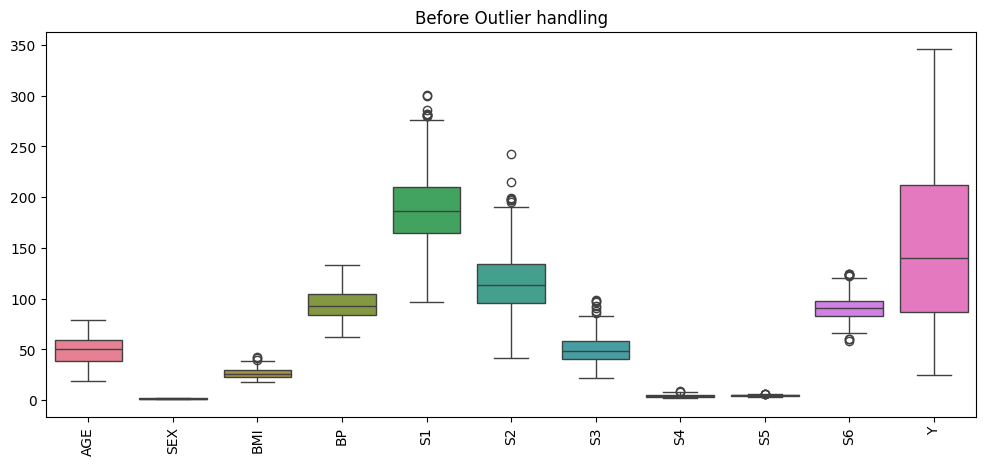

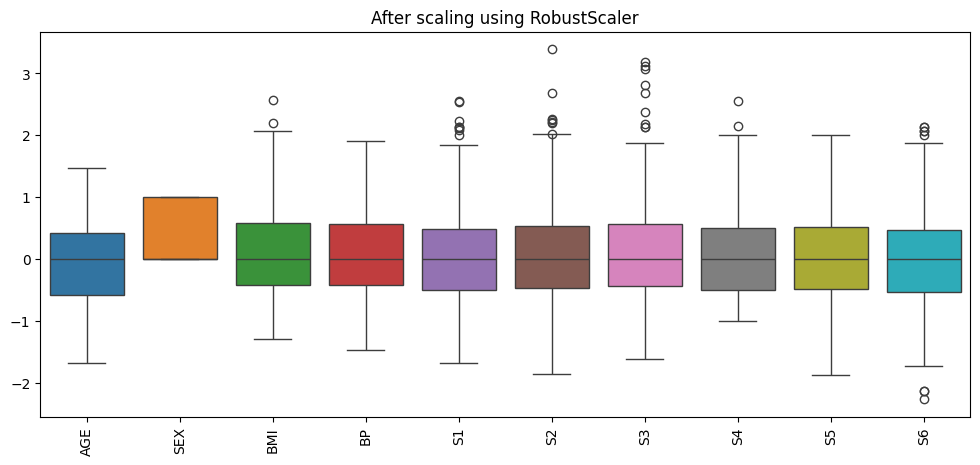

In [17]:
# Boxplots: Before vs After handling outliers

plt.figure(figsize=(12, 5))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Before Outlier handling')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_train_scaled.select_dtypes(include='number'))
plt.title('After scaling using RobustScaler')
plt.xticks(rotation=90)
plt.show()

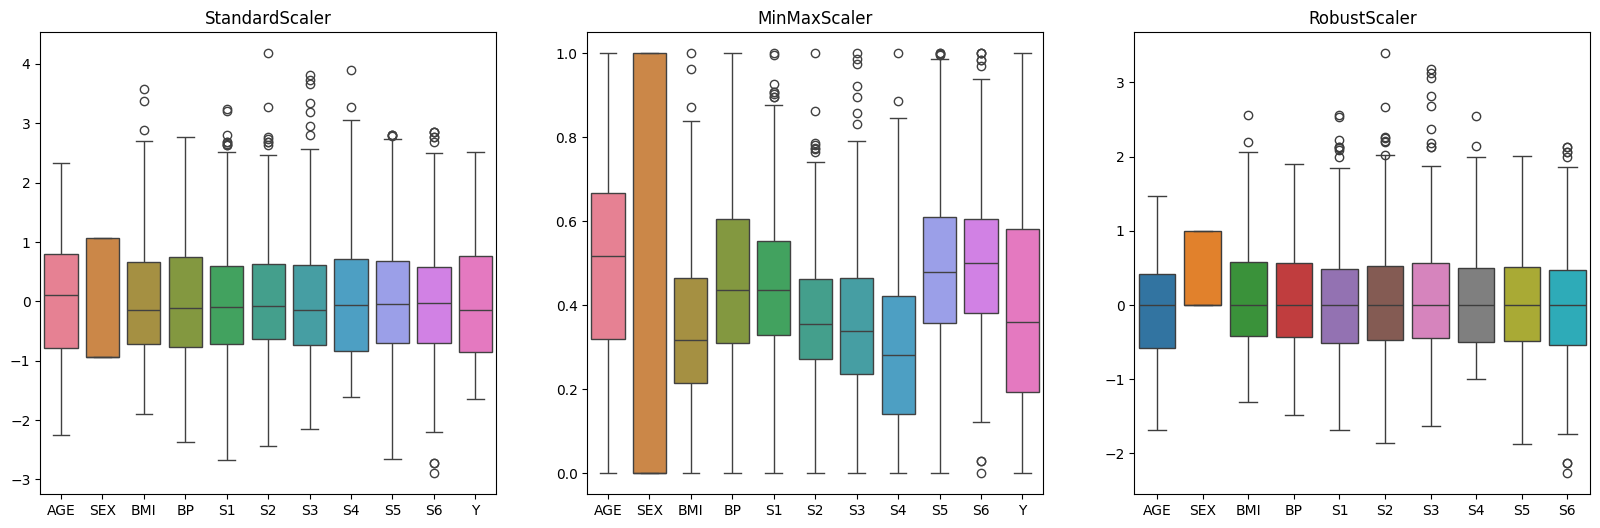

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(data=scaled_std, ax=axes[0])
axes[0].set_title("StandardScaler")

sns.boxplot(data=scaled_mm, ax=axes[1])
axes[1].set_title("MinMaxScaler")

sns.boxplot(data=X_train_scaled, ax=axes[2])
axes[2].set_title("RobustScaler")

plt.show()


# Model training with outliers that were scaled by RobustScaler

## Import necessary libraries for model training

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, pred_lr)


## Random forest

### Define grid

In [21]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

### Grid search cv

In [22]:
rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Params:", grid_rf.best_params_)

Best RF params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}


### Predict evaluate

In [23]:
pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, pred_rf)

## Gradient Boosting regressor + tuning

### Param grid

In [24]:
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

### Grid search

In [25]:
gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)

best_gb = grid_gb.best_estimator_
print("Params:", grid_gb.best_params_)

Best GB params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


### Predict and evaluate

In [26]:
pred_gb = best_gb.predict(X_test_scaled)

mae_gb = mean_absolute_error(y_test, pred_gb)
mse_gb = mean_squared_error(y_test, pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, pred_gb)

## Results

In [27]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_lr, mae_rf, mae_gb],
    "MSE": [mse_lr, mse_rf, mse_gb],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb],
    "R2 Score": [r2_lr, r2_rf, r2_gb]
})

results

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,42.794095,2900.193628,53.853446,0.452603
1,Random Forest,42.725168,2774.561442,52.674106,0.476315
2,Gradient Boosting,42.582154,2749.649262,52.437098,0.481017


# Utils that was used to show the results

In [28]:
def eval_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


# Model training where Outliers where removed with IQR method

## Remove outliers

In [31]:
Q1_iqr = df.quantile(0.25)
Q3_iqr = df.quantile(0.75)
IQR_iqr = Q3_iqr - Q1_iqr

mask_iqr = ~((df < (Q1_iqr - 1.5 * IQR_iqr)) | (df > (Q3_iqr + 1.5 * IQR_iqr))).any(axis=1)

df_iqr_clean = df[mask_iqr].reset_index(drop=True)

print("Previous:", len(df))
print("Now:", len(df_iqr_clean))

Previous: 442
Now: 411


## Train test split

In [33]:
target = "Y"

X = df_iqr_clean.drop(target, axis=1)
y = df_iqr_clean[target]
test_size=0.2
random_state=42

X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_test_split(X, y, test_size=test_size, random_state=random_state)
print('Train size:', X_train_without_outliers.shape, '| Test size:', X_test_without_outliers.shape)

Train size: (328, 10) | Test size: (83, 10)


## Model training

In [37]:
results_iqr = []

# Linear regression without outliers
lr_iqr = LinearRegression()
lr_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_lr_iqr = lr_iqr.predict(X_test_without_outliers)
results_iqr.append(eval_model("Linear Regression (IQR)", y_test_without_outliers, pred_lr_iqr))

# Random forest without outliers
param_grid_iqr = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

rf_iqr = RandomForestRegressor(random_state=42)
grid_rf_iqr = GridSearchCV(rf_iqr, param_grid_iqr, cv=5, n_jobs=-1)
grid_rf_iqr.fit(X_train_without_outliers, y_train_without_outliers)
best_rf_iqr = grid_rf_iqr.best_estimator_
pred_rf_iqr = best_rf_iqr.predict(X_test_without_outliers)
results_iqr.append(eval_model("Random Forest (IQR)", y_test_without_outliers, pred_rf_iqr))


# Gradient Boosting regressor without outliers
param_grid_gb_iqr = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

gb_iqr = GradientBoostingRegressor(random_state=42)
grid_gb_iqr = GridSearchCV(gb_iqr, param_grid_gb_iqr, cv=5, n_jobs=-1)
grid_gb_iqr.fit(X_train_without_outliers, y_train_without_outliers)
best_gb_iqr = grid_gb_iqr.best_estimator_
pred_gb_iqr = best_gb_iqr.predict(X_test_without_outliers)
results_iqr.append(eval_model("Gradient Boosting (IQR)", y_test_without_outliers, pred_gb_iqr))

pd.DataFrame(results_iqr)


,Model,MAE,MSE,RMSE,R2
0,Linear Regression (IQR),45.073266,3175.043351,56.347523,0.518642
1,Random Forest (IQR),47.081602,3414.595935,58.434544,0.482324
2,Gradient Boosting (IQR),47.606703,3351.964218,57.896150,0.491819


# Try Ridge, Lasso and ElasticNet model training methods

## Load necessary libs for this training

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Train them

In [63]:
results_lin = []

# Ridge with and without outliers
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)
results_lin.append(eval_model("Ridge (alpha=1.0)", y_test, pred_ridge))

ridge_iqr = Ridge(alpha=1.0, random_state=42)
ridge_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_ridge_iqr = ridge_iqr.predict(X_test_without_outliers)
results_lin.append(eval_model("Ridge (alpha=1.0) without outliers", y_test_without_outliers, pred_ridge_iqr))

# Lasso with and without outliers
lasso = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)
results_lin.append(eval_model("Lasso (alpha=0.01)", y_test, pred_lasso))

lasso_iqr = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_lasso_iqr = lasso_iqr.predict(X_test_without_outliers)
results_lin.append(eval_model("Lasso (alpha=0.01) without outliers", y_test_without_outliers, pred_lasso_iqr))

# ElasticNet with and without outliers
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic.fit(X_train_scaled, y_train)
pred_elastic = elastic.predict(X_test_scaled)
results_lin.append(eval_model("ElasticNet (alpha=0.01, l1_ratio=0.5)", y_test, pred_elastic))

elastic_iqr = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_elastic_iqr = elastic_iqr.predict(X_test_without_outliers)
results_lin.append(eval_model("ElasticNet (alpha=0.01, l1_ratio=0.5) without outliers", y_test_without_outliers, pred_elastic_iqr))

pd.DataFrame(results_lin)


,Model,MAE,MSE,RMSE,R2
0,Ridge (alpha=1.0),42.826022,2887.753622,53.737823,0.454951
1,Ridge (alpha=1.0) without outliers,44.939837,3168.329914,56.287920,0.519660
2,Lasso (alpha=0.01),42.795632,2897.650390,53.829828,0.453083
3,Lasso (alpha=0.01) without outliers,45.064143,3174.742783,56.344856,0.518687
4,"ElasticNet (alpha=0.01, l1_ratio=0.5)",42.842929,2882.948793,53.693098,0.455858
5,"ElasticNet (alpha=0.01, l1_ratio=0.5) without ...",44.866164,3165.361387,56.261544,0.520110


# XGBoost and CatBoost

## Install necessary libs

In [41]:
!pip install xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


## Import necessary libs

In [42]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## XGBoost regressor

In [61]:
xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb.fit(X_train_scaled, y_train)
pred_xgb = xgb.predict(X_test_scaled)
res_xgb = eval_model("XGBoost", y_test, pred_xgb)

xgb_iqr = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_xgb_iqr = xgb_iqr.predict(X_test_without_outliers)
res_xgb_iqr = eval_model("XGBoost without outliers", y_test_without_outliers, pred_xgb_iqr)


pd.DataFrame([res_xgb, res_xgb_iqr])


,Model,MAE,MSE,RMSE,R2
0,XGBoost,44.816467,3217.954102,56.727014,0.392627
1,XGBoost without outliers,48.050686,3479.955078,58.991144,0.472415


## CatBoost regressor

In [62]:
cat = CatBoostRegressor(
    depth=4,
    learning_rate=0.05,
    n_estimators=400,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

cat.fit(X_train_scaled, y_train)
pred_cat = cat.predict(X_test_scaled)
res_cat = eval_model("CatBoost", y_test, pred_cat)

cat_iqr = CatBoostRegressor(
    depth=4,
    learning_rate=0.05,
    n_estimators=400,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

cat_iqr.fit(X_train_without_outliers, y_train_without_outliers)
pred_cat_iqr = cat_iqr.predict(X_test_without_outliers)
res_cat_iqr = eval_model("CatBoost without outliers", y_test_without_outliers, pred_cat_iqr)

pd.DataFrame([res_cat, res_cat_iqr])

,Model,MAE,MSE,RMSE,R2
0,CatBoost,44.364513,2872.115500,53.592122,0.457902
1,CatBoost without outliers,47.263629,3306.880608,57.505483,0.498654


# Bigger hyperparameter grids with RandomizedSearch and Bayesian Tuning

## Install necessary libs

In [50]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.1 MB/s eta 0:00:00


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real

## RandomizedSearchCV for Random forest

In [53]:
rf_base = RandomForestRegressor(random_state=42)

param_dist_rf = {
    "n_estimators": [200, 300, 500, 700, 1000],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rand_search_rf = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rand_search_rf.fit(X_train, y_train)
rf_best_rand = rand_search_rf.best_estimator_
pred_rf_rand = rf_best_rand.predict(X_test)

# without outliers
rf_base_iqr = RandomForestRegressor(random_state=42)

rand_search_rf_iqr = RandomizedSearchCV(
    rf_base_iqr,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rand_search_rf_iqr.fit(X_train_without_outliers, y_train_without_outliers)
rf_best_rand_iqr = rand_search_rf_iqr.best_estimator_
pred_rf_rand_iqr = rf_best_rand_iqr.predict(X_test_without_outliers)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


## Bayesian tuning for XGBoost

In [54]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

search_spaces_xgb = {
    "n_estimators": Integer(200, 800),
    "max_depth": Integer(2, 8),
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "subsample": Real(0.5, 1.0),
    "colsample_bytree": Real(0.5, 1.0)
}

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_base,
    search_spaces=search_spaces_xgb,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_xgb.fit(X_train_scaled, y_train)
xgb_best_bayes = bayes_search_xgb.best_estimator_
pred_xgb_bayes = xgb_best_bayes.predict(X_test_scaled)

# without outliers
bayes_search_xgb_iqr = BayesSearchCV(
    estimator=xgb_base,
    search_spaces=search_spaces_xgb,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_xgb_iqr.fit(X_train_without_outliers, y_train_without_outliers)
xgb_best_bayes_iqr = bayes_search_xgb_iqr.best_estimator_
pred_xgb_bayes_iqr = xgb_best_bayes_iqr.predict(X_test_without_outliers)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Results

In [60]:
res_rf_rand = eval_model("Random Forest (RandomizedSearch)", y_test, pred_rf_rand)
res_rf_rand_iqr = eval_model("Random Forest (RandomizedSearch) without outliers", y_test_without_outliers, pred_rf_rand_iqr)
res_xgb_bayes = eval_model("XGBoost (Bayesian)", y_test, pred_xgb_bayes)
res_xgb_bayes_iqr = eval_model("XGBoost (Bayesian) without outliers", y_test_without_outliers, pred_xgb_bayes_iqr)

pd.DataFrame([res_rf_rand, res_rf_rand_iqr, res_xgb_bayes, res_xgb_bayes_iqr])

,Model,MAE,MSE,RMSE,R2
0,Random Forest (RandomizedSearch),43.573224,2821.063230,53.113682,0.467538
1,Random Forest (RandomizedSearch) without outliers,46.805187,3267.544179,57.162437,0.504618
2,XGBoost (Bayesian),41.927536,2684.531250,51.812462,0.493308
3,XGBoost (Bayesian) without outliers,46.250881,3212.671631,56.680434,0.512937
